In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
arabi_genes = pd.read_csv('/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/populus_gene_results.csv', index_col= 0)
arabi_ortho = pd.read_csv('/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/populus_ortho_trimmed_out_2_gene_families.csv', index_col= 0)
tomato_genes = pd.read_csv('/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/soybean_gene_results.csv', index_col= 0)
tomato_ortho = pd.read_csv('/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/soybean_ortho_trimmed_out_2_gene_families.csv', index_col= 0)

In [4]:
log_fc_change_evaluation_value = 1.5
log_fc_change_evaluation_value_negative = -1*log_fc_change_evaluation_value

In [5]:
tomato_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10092at3193,22.502080,-0.413890,0.371788,-1.113243,0.265604,0.626270
10147at3193,68.932967,-0.015256,0.245894,-0.062041,0.950530,0.986712
10228at3193,272.773793,0.214799,0.186410,1.152294,0.249200,0.607854
10488at3193,79.316090,-0.890832,0.272759,-3.266004,0.001091,0.023425
10582at3193,30.857010,-0.641621,0.362143,-1.771731,0.076439,0.328666
...,...,...,...,...,...,...
9828at3193,351.248933,-0.128416,0.169502,-0.757610,0.448684,0.777187
9836at3193,32.645742,0.220009,0.317083,0.693852,0.487775,0.804927
9877at3193,119.059401,-0.106873,0.204422,-0.522805,0.601110,0.866726
9919at3193,15.982399,-0.347541,0.504140,-0.689373,0.490588,0.806409


In [6]:
trimmed_tomato_ortho = tomato_ortho.loc[tomato_ortho.index.isin(arabi_ortho.index)]
trimmed_arabi_ortho = arabi_ortho.loc[arabi_ortho.index.isin(trimmed_tomato_ortho.index)]


In [7]:
trimmed_arabi_ortho_named = trimmed_arabi_ortho.rename(columns = {'log2FoldChange':'Arabidopsis Log2FC'})
trimmed_tomato_ortho_named = trimmed_tomato_ortho.rename(columns = {'log2FoldChange':'Tomato Log2FC'})



In [8]:
merged_ortho_df = trimmed_arabi_ortho_named[['Arabidopsis Log2FC']].merge(right = trimmed_tomato_ortho_named, left_index= True, right_index = True)

In [9]:
merged_ortho_df

,Arabidopsis Log2FC,baseMean,Tomato Log2FC,lfcSE,stat,pvalue,padj
10092at3193,0.047081,22.502080,-0.413890,0.371788,-1.113243,0.265604,0.626270
10147at3193,0.001197,68.932967,-0.015256,0.245894,-0.062041,0.950530,0.986712
10228at3193,-0.205620,272.773793,0.214799,0.186410,1.152294,0.249200,0.607854
10648at3193,-0.220904,166.688048,-0.153108,0.189204,-0.809223,0.418387,0.761169
10772at3193,-0.527379,388.304278,-0.381513,0.180482,-2.113853,0.034528,0.210245
...,...,...,...,...,...,...,...
9789at3193,-0.264797,118.335632,0.130850,0.214015,0.611404,0.540932,0.835765
9836at3193,0.017085,32.645742,0.220009,0.317083,0.693852,0.487775,0.804927
9877at3193,0.619882,119.059401,-0.106873,0.204422,-0.522805,0.601110,0.866726
9919at3193,-0.329935,15.982399,-0.347541,0.504140,-0.689373,0.490588,0.806409


In [10]:
log_fc_change_evaluation_value

1.5

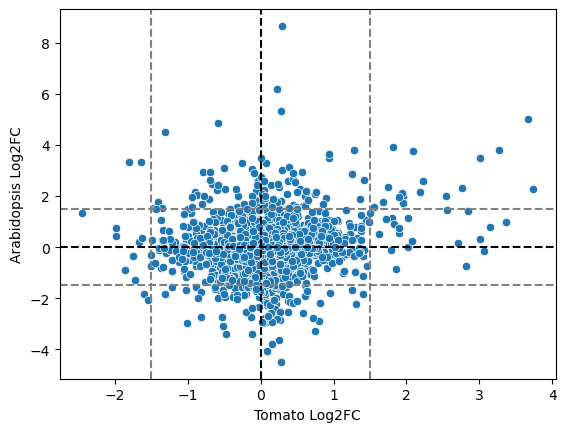

In [11]:
sns.scatterplot(data = merged_ortho_df, x ='Tomato Log2FC', y = 'Arabidopsis Log2FC' )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(x =log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(y =log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(x =log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(y =log_fc_change_evaluation_value_negative, color="grey", linestyle="--")

Text(0, 0.5, 'Orthogroup-wise log2-fold change in \n poplar Drought')

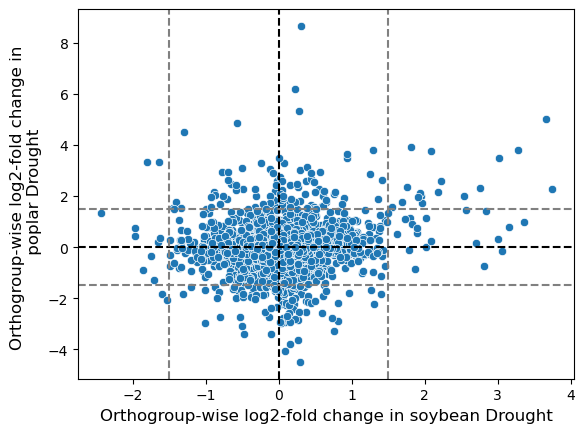

In [12]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.xlabel("Orthogroup-wise log2-fold change in soybean Drought", fontsize = 12)
plt.ylabel("Orthogroup-wise log2-fold change in \n poplar Drought", fontsize = 12)

In [13]:
trimmed_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10092at3193,270.123634,0.047081,0.166977,0.281961,7.779735e-01,0.855615
10147at3193,335.526005,0.001197,0.117523,0.010188,9.918717e-01,0.995611
10228at3193,603.576550,-0.205620,0.119945,-1.714278,8.647764e-02,0.171035
10648at3193,1065.750602,-0.220904,0.101912,-2.167603,3.018894e-02,0.073410
10772at3193,983.863200,-0.527379,0.105322,-5.007306,5.519721e-07,0.000005
...,...,...,...,...,...,...
9789at3193,264.605584,-0.264797,0.135442,-1.955062,5.057578e-02,0.111714
9836at3193,277.145772,0.017085,0.133631,0.127853,8.982654e-01,0.939738
9877at3193,978.400784,0.619882,0.172812,3.587032,3.344629e-04,0.001542
9919at3193,267.535702,-0.329935,0.139675,-2.362164,1.816858e-02,0.048359


In [13]:
all(trimmed_arabi_ortho.index == trimmed_tomato_ortho.index)

True

In [14]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]

In [15]:
merged_result['Classification'] = 'Non-substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_872419/2994845458.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = 'S

Text(0, 0.5, 'Orthogroup-wise log2-fold change in poplar Drought')

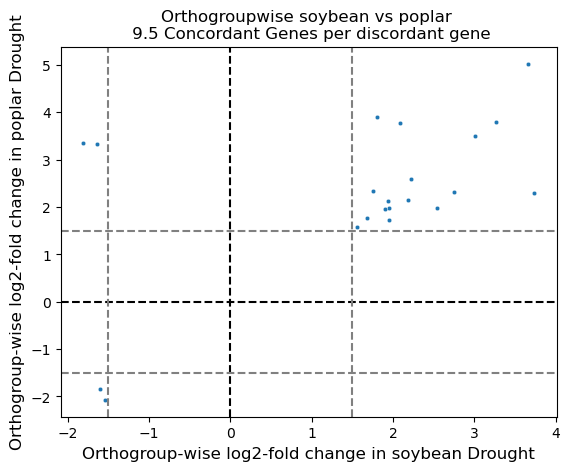

In [16]:
sns.scatterplot(data = merged_result.loc[merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10)
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.title('Orthogroupwise soybean vs poplar \n 9.5 Concordant Genes per discordant gene')
plt.xlabel("Orthogroup-wise log2-fold change in soybean Drought", fontsize = 12)
plt.ylabel("Orthogroup-wise log2-fold change in poplar Drought", fontsize = 12)

In [17]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

9.5

In [18]:
discord_bottom

,Tomato,Arabi


In [19]:
discord_top

,Tomato,Arabi
190,-1.639909,3.341511
1981,-1.808988,3.344977


In [20]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])
pos_thresh = 1
neg_thresh = 1
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.9488263903573694
0.9488263903573694
0.9488263903573694
0.9488263903573694


In [21]:
arabi_disconcordant_change

,Tomato,Arabi
49,0.282820,1.788228
60,-0.064463,1.649948
116,-0.396134,1.257728
122,0.819955,1.018580
146,-0.059004,2.206118
...,...,...
4661,-0.699561,1.023059
4671,-0.086915,2.888316
4699,1.372303,0.274388
4707,0.728150,1.077196


In [22]:
tomato_any_change

,Tomato,Arabi
0,-0.413890,0.047081
1,-0.015256,0.001197
2,0.214799,-0.205620
3,-0.153108,-0.220904
4,-0.381513,-0.527379
...,...,...
4724,0.130850,-0.264797
4725,0.220009,0.017085
4726,-0.106873,0.619882
4727,-0.347541,-0.329935


In [23]:
tomato_concordant_change

,Tomato,Arabi
0,-0.413890,0.047081
1,-0.015256,0.001197
2,0.214799,-0.205620
3,-0.153108,-0.220904
4,-0.381513,-0.527379
...,...,...
4724,0.130850,-0.264797
4725,0.220009,0.017085
4726,-0.106873,0.619882
4727,-0.347541,-0.329935


In [24]:
arabidopsis_tomato_nm = pd.read_csv('/data/passala/OrthoDB_data/V_11_pairwise_maps_fixed_problem_species/poplar_to_soybean_ortholog_NM.csv')

In [25]:
arabidopsis_tomato_nm

,poplar OrthoGene,soybean OrthoGene,Orthogroup,poplar Symbol,soybean Symbol
0,3694_0:001233,3847_0:001d45,10009at3193,LOC7490624,GLYMA_04G021200
1,3694_0:002af4,3847_0:001d45,10009at3193,LOC7493995,GLYMA_04G021200
2,3694_0:001233,3847_0:002e23,10009at3193,LOC7490624,GLYMA_06G021400
3,3694_0:002af4,3847_0:002e23,10009at3193,LOC7493995,GLYMA_06G021400
4,3694_0:001233,3847_0:007f21,10009at3193,LOC7490624,GLYMA_14G221800
...,...,...,...,...,...
135373,3694_0:003924,3847_0:00489a,9942at3193,LOC7486068,GLYMA_08G126200
135374,3694_0:006c89,3847_0:00489a,9942at3193,LOC18106376,GLYMA_08G126200
135375,3694_0:003631,3847_0:0048d1,9942at3193,LOC7459917,GLYMA_08G068100
135376,3694_0:003924,3847_0:0048d1,9942at3193,LOC7486068,GLYMA_08G068100


In [26]:
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'poplar Symbol',)
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'soybean Symbol',)
arabidopsis_tomato_nm

,poplar OrthoGene,soybean OrthoGene,Orthogroup,poplar Symbol,soybean Symbol
0,3694_0:001233,3847_0:001d45,10009at3193,LOC7490624,GLYMA_04G021200
8,3694_0:003278,3847_0:0022f2,10092at3193,LOC7491983,GLYMA_04G056600
14,3694_0:005459,3847_0:001acf,10147at3193,LOC7487099,GLYMA_03G107300
24,3694_0:005579,3847_0:002544,10228at3193,LOC7487096,GLYMA_05G233100
28,3694_0:000205,3847_0:00393f,10238at3193,LOC18095765,GLYMA_07G037800
...,...,...,...,...,...
135347,3694_0:00642f,3847_0:001b3a,9828at3193,LOC7474846,GLYMA_04G175400
135350,3694_0:003078,3847_0:002354,9836at3193,LOC7471571,GLYMA_04G069600
135354,3694_0:005ef2,3847_0:000e97,9877at3193,LOC7466294,GLYMA_02G288500
135362,3694_0:000ad6,3847_0:005414,9919at3193,LOC7478120,GLYMA_09G084600


In [27]:
arabi_genes_trimmed = arabi_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['soybean Symbol','poplar Symbol']], right_on= 'poplar Symbol')
arabi_genes_trimmed = arabi_genes_trimmed.drop_duplicates(subset = 'poplar Symbol', keep = False)
arabi_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,soybean Symbol,poplar Symbol
2563,582.515487,-0.013105,0.133364,-0.098263,9.217236e-01,9.520394e-01,GLYMA_07G225200,LOC7483220
26867,1156.143971,-0.061269,0.105583,-0.580292,5.617175e-01,6.911157e-01,GLYMA_11G094000,LOC7457682
89073,36.810004,-6.161280,0.886072,-6.953478,3.563892e-12,6.235067e-11,GLYMA_01G214400,LOC7483221
73381,373.721663,0.166619,0.133448,1.248572,2.118218e-01,3.447549e-01,GLYMA_07G225100,LOC7483224
75507,128.488022,-0.087110,0.226224,-0.385060,7.001930e-01,8.004712e-01,GLYMA_07G225000,LOC7457684
...,...,...,...,...,...,...,...,...
9498,92.242638,0.657088,0.228053,2.881292,3.960491e-03,1.335250e-02,GLYMA_13G163200,LOC7460232
8820,360.460171,-0.039994,0.173587,-0.230398,8.177827e-01,8.826802e-01,GLYMA_11G120800,LOC18102130
111282,121.415249,0.246239,0.201902,1.219595,2.226183e-01,3.574592e-01,GLYMA_02G128300,LOC7485925
124113,83.013009,-0.338916,0.240249,-1.410686,1.583374e-01,2.768548e-01,GLYMA_01G093900,LOC7471121


In [28]:
arabidopsis_tomato_nm

,poplar OrthoGene,soybean OrthoGene,Orthogroup,poplar Symbol,soybean Symbol
0,3694_0:001233,3847_0:001d45,10009at3193,LOC7490624,GLYMA_04G021200
8,3694_0:003278,3847_0:0022f2,10092at3193,LOC7491983,GLYMA_04G056600
14,3694_0:005459,3847_0:001acf,10147at3193,LOC7487099,GLYMA_03G107300
24,3694_0:005579,3847_0:002544,10228at3193,LOC7487096,GLYMA_05G233100
28,3694_0:000205,3847_0:00393f,10238at3193,LOC18095765,GLYMA_07G037800
...,...,...,...,...,...
135347,3694_0:00642f,3847_0:001b3a,9828at3193,LOC7474846,GLYMA_04G175400
135350,3694_0:003078,3847_0:002354,9836at3193,LOC7471571,GLYMA_04G069600
135354,3694_0:005ef2,3847_0:000e97,9877at3193,LOC7466294,GLYMA_02G288500
135362,3694_0:000ad6,3847_0:005414,9919at3193,LOC7478120,GLYMA_09G084600


In [29]:
tomato_genes.head(50)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GLYMA_01G000400,224.365209,-0.560751,0.197534,-2.838758,0.004529,0.055018
GLYMA_01G000600,106.238981,0.030497,0.252662,0.120702,0.903927,0.970012
GLYMA_01G000900,167.690179,-0.274119,0.228812,-1.198009,0.230913,0.557737
GLYMA_01G001000,112.427969,0.308408,0.252900,1.219487,0.222659,0.548515
GLYMA_01G001100,268.653460,0.262773,0.264730,0.992604,0.320903,0.648234
GLYMA_01G001200,47.561630,-0.083910,0.345507,-0.242861,0.808113,0.935528
GLYMA_01G001300,774.256667,-0.315194,0.194348,-1.621805,0.104845,0.370045
GLYMA_01G001700,33.027022,-0.307884,0.365246,-0.842950,0.399256,0.715710
GLYMA_01G002100,774.098202,-0.032213,0.315491,-0.102103,0.918675,0.976560
GLYMA_01G002200,96.792504,0.246156,0.268953,0.915240,0.360066,0.682681


In [30]:
tomato_genes_trimmed = tomato_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['soybean Symbol','poplar Symbol']], right_on= 'soybean Symbol')
#tomato_genes_trimmed = tomato_genes_trimmed.drop_duplicates(subset = 'poplar Symbol', keep = False)
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,soybean Symbol,poplar Symbol
1464,224.365209,-0.560751,0.197534,-2.838758,0.004529,0.055018,GLYMA_01G000400,LOC18098062
17140,112.427969,0.308408,0.252900,1.219487,0.222659,0.548515,GLYMA_01G001000,LOC7487237
39229,268.653460,0.262773,0.264730,0.992604,0.320903,0.648234,GLYMA_01G001100,LOC7487233
101343,47.561630,-0.083910,0.345507,-0.242861,0.808113,0.935528,GLYMA_01G001200,LOC7487230
38263,774.256667,-0.315194,0.194348,-1.621805,0.104845,0.370045,GLYMA_01G001300,LOC7487228
...,...,...,...,...,...,...,...,...
123825,112.463572,-0.161127,0.238895,-0.674466,0.500015,0.785218,GLYMA_20G248800,LOC7472336
51618,94.660813,0.312866,0.245910,1.272278,0.203274,0.522714,GLYMA_20G249100,LOC7484469
63082,155.140195,-0.278309,0.218691,-1.272616,0.203154,0.522661,GLYMA_20G249400,LOC7460567
72790,90.265560,-0.280145,0.311787,-0.898516,0.368911,0.689420,GLYMA_20G249700,LOC7477769


In [31]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,soybean Symbol,poplar Symbol
1464,224.365209,-0.560751,0.197534,-2.838758,0.004529,0.055018,GLYMA_01G000400,LOC18098062
17140,112.427969,0.308408,0.252900,1.219487,0.222659,0.548515,GLYMA_01G001000,LOC7487237
39229,268.653460,0.262773,0.264730,0.992604,0.320903,0.648234,GLYMA_01G001100,LOC7487233
101343,47.561630,-0.083910,0.345507,-0.242861,0.808113,0.935528,GLYMA_01G001200,LOC7487230
38263,774.256667,-0.315194,0.194348,-1.621805,0.104845,0.370045,GLYMA_01G001300,LOC7487228
...,...,...,...,...,...,...,...,...
123825,112.463572,-0.161127,0.238895,-0.674466,0.500015,0.785218,GLYMA_20G248800,LOC7472336
51618,94.660813,0.312866,0.245910,1.272278,0.203274,0.522714,GLYMA_20G249100,LOC7484469
63082,155.140195,-0.278309,0.218691,-1.272616,0.203154,0.522661,GLYMA_20G249400,LOC7460567
72790,90.265560,-0.280145,0.311787,-0.898516,0.368911,0.689420,GLYMA_20G249700,LOC7477769


In [32]:
arabi_genes_trimmed = arabi_genes_trimmed.loc[arabi_genes_trimmed['poplar Symbol'].isin(tomato_genes_trimmed['poplar Symbol'])]
tomato_genes_trimmed = tomato_genes_trimmed.loc[tomato_genes_trimmed['soybean Symbol'].isin(arabi_genes_trimmed['soybean Symbol'])]


In [33]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,soybean Symbol,poplar Symbol
1464,224.365209,-0.560751,0.197534,-2.838758,0.004529,0.055018,GLYMA_01G000400,LOC18098062
17140,112.427969,0.308408,0.252900,1.219487,0.222659,0.548515,GLYMA_01G001000,LOC7487237
39229,268.653460,0.262773,0.264730,0.992604,0.320903,0.648234,GLYMA_01G001100,LOC7487233
45296,33.027022,-0.307884,0.365246,-0.842950,0.399256,0.715710,GLYMA_01G001700,LOC7485520
52372,774.098202,-0.032213,0.315491,-0.102103,0.918675,0.976560,GLYMA_01G002100,LOC18099958
...,...,...,...,...,...,...,...,...
123825,112.463572,-0.161127,0.238895,-0.674466,0.500015,0.785218,GLYMA_20G248800,LOC7472336
51618,94.660813,0.312866,0.245910,1.272278,0.203274,0.522714,GLYMA_20G249100,LOC7484469
63082,155.140195,-0.278309,0.218691,-1.272616,0.203154,0.522661,GLYMA_20G249400,LOC7460567
72790,90.265560,-0.280145,0.311787,-0.898516,0.368911,0.689420,GLYMA_20G249700,LOC7477769


In [34]:
tomato_genes_trimmed = (tomato_genes_trimmed.set_index('poplar Symbol')
          .reindex(arabi_genes_trimmed.set_index('poplar Symbol').index)
          .reset_index()
       )

In [35]:
tomato_genes_trimmed

,poplar Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,soybean Symbol
0,LOC7483220,177.163084,0.096740,0.248521,0.389263,0.697081,0.891128,GLYMA_07G225200
1,LOC7457682,194.224521,-0.164455,0.252959,-0.650124,0.515612,0.794459,GLYMA_11G094000
2,LOC7483224,52.899667,-0.103125,0.308109,-0.334702,0.737850,0.907634,GLYMA_07G225100
3,LOC7457684,29.779076,-0.515619,0.410959,-1.254674,0.209597,0.531858,GLYMA_07G225000
4,LOC7483227,196.438676,-0.815651,0.252285,-3.233058,0.001225,0.022763,GLYMA_05G000700
...,...,...,...,...,...,...,...,...
6733,LOC7494645,95.223648,0.035219,0.250132,0.140802,0.888026,0.964230,GLYMA_02G238400
6734,LOC7465889,83.454412,0.042349,0.253195,0.167260,0.867166,0.957490,GLYMA_09G244700
6735,LOC7460232,17.455130,-0.192254,0.461161,-0.416893,0.676757,0.881702,GLYMA_13G163200
6736,LOC18102130,573.722812,-0.198881,0.201380,-0.987588,0.323354,0.650885,GLYMA_11G120800


In [36]:
arabi_genes_trimmed = arabi_genes_trimmed.reset_index()

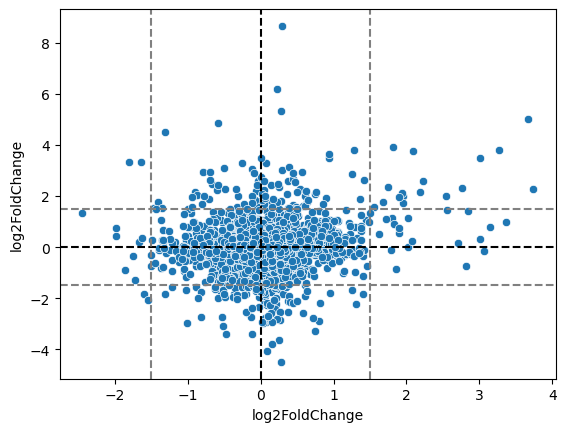

In [37]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")

Text(0, 0.5, 'Genewise log2-fold change in \n poplar Drought')

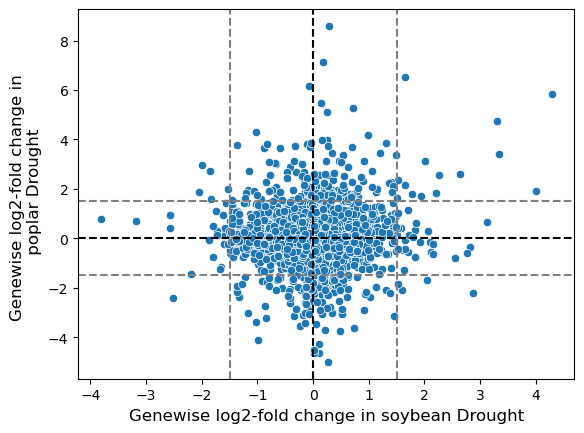

In [38]:
sns.scatterplot(x =tomato_genes_trimmed['log2FoldChange'], y = arabi_genes_trimmed['log2FoldChange'])
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.xlabel("Genewise log2-fold change in soybean Drought", fontsize = 12)
plt.ylabel("Genewise log2-fold change in \n poplar Drought", fontsize = 12)

In [39]:
new_merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]

In [40]:
new_merged_result['Classification'] = 'Non-substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_872419/1856289886.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_

Text(0, 0.5, 'Genewise log2-fold change in Sorghum Drought')

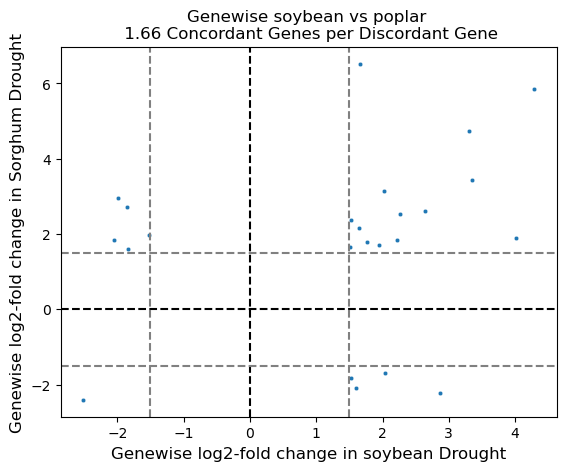

In [41]:
sns.scatterplot(data = new_merged_result.loc[new_merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10 )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.title('Genewise soybean vs poplar \n 1.66 Concordant Genes per Discordant Gene')
plt.xlabel("Genewise log2-fold change in soybean Drought", fontsize = 12)
plt.ylabel("Genewise log2-fold change in Sorghum Drought", fontsize = 12)

In [42]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

1.6666666666666667

In [342]:
all_over_1

,Tomato,Arabi
128,5.420722,2.289623
163,2.688214,1.658393
165,1.529409,1.995355
351,6.788676,2.372646
582,7.428141,2.349108
660,4.131078,2.303250
847,4.748212,2.510446
968,5.096113,2.105806
1064,3.039029,1.728921
1218,2.317202,3.015622


In [343]:
all_under_1

,Tomato,Arabi
1302,-1.546548,-1.996698
3401,-1.570759,-1.713524
4504,-1.584948,-4.405051
4944,-5.482556,-1.861803
5162,-1.628072,-2.431291


In [344]:
merged_result

,Tomato,Arabi
0,-0.145039,0.054831
1,-0.023699,-0.092506
2,0.074602,-0.769619
3,-0.647447,-0.563822
4,-0.407818,-0.445230
...,...,...
3199,2.262803,0.036704
3200,0.376672,0.168016
3201,0.401132,0.728854
3202,-0.146726,-0.288193


In [345]:
merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

pos_thresh = 0
neg_thresh = 0
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.6387687188019967
0.6387687188019967
0.6387687188019967
0.6387687188019967


In [346]:
stats.spearmanr(a=tomato_genes_trimmed['log2FoldChange'], b = arabi_genes_trimmed['log2FoldChange'] )

SignificanceResult(statistic=0.3778838983240342, pvalue=2.6260518647079396e-203)

In [347]:
down = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] <= -2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
up = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] >= 2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
down_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] <= -2)
    & (arabi_genes_trimmed["padj"] <= 0.001)
]
up_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] >= 2) & (arabi_genes_trimmed["padj"] <= 0.001)
]

In [348]:
down_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] <= -2)
    & (trimmed_arabi_ortho["padj"] <= 0.001)
]
up_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] >= 2) & (trimmed_arabi_ortho["padj"] <= 0.001)]

down_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] <= -2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]
up_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] >= 2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]

In [349]:
len(up_arabi_ortho.merge(how = "inner", right_index = True, left_index= True, right = up_ortho))

5

In [350]:
up_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
114446at3193,1241.209942,3.515908,0.459146,7.657494,1.895955e-14,3.277839e-13
118011at3193,572.664338,2.646269,0.254130,10.413035,2.162169e-25,1.102920e-23
118239at3193,218.445035,2.275324,0.171891,13.236980,5.366364e-40,6.143890e-38
118532at3193,1725.105212,2.161990,0.139590,15.488117,4.173376e-54,1.023868e-51
127999at3193,39.111363,2.056699,0.405571,5.071118,3.954849e-07,2.217125e-06
136845at3193,242.212243,2.145751,0.298576,7.186620,6.641495e-13,9.452205e-12
137296at3193,707.220252,2.480940,0.193344,12.831742,1.088883e-37,1.121985e-35
138520at3193,44.488378,4.133091,0.588411,7.024155,2.153657e-12,2.760110e-11
139009at3193,99.410629,2.081851,0.330890,6.291672,3.140650e-10,2.958068e-09
139101at3193,78.287068,2.997948,0.494597,6.061394,1.349466e-09,1.164564e-08


In [351]:
up_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
137296at3193,2161.067885,2.174250,0.528502,4.113983,3.888909e-05,5.491535e-04
138520at3193,76.412410,2.153709,0.393055,5.479408,4.267515e-08,1.911330e-06
402643at3193,166.541104,2.019380,0.352363,5.730967,9.985962e-09,5.466390e-07
404029at3193,194.154600,2.164346,0.350151,6.181175,6.362634e-10,5.037842e-08
649605at3193,47.270308,2.015115,0.408406,4.934102,8.052030e-07,2.190350e-05
685441at3193,81.660743,2.091774,0.416022,5.028042,4.955136e-07,1.445465e-05


In [352]:
up

,sorghum Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,maize Symbol
100,LOC8079693,195.258840,2.983458,0.416281,7.166938,7.669375e-13,1.113223e-11,Zm00001d034723
128,LOC8057046,2520.801630,5.420722,0.532738,10.175209,2.558510e-24,1.155618e-22,Zm00001d034643
163,LOC8057096,41.640932,2.688214,0.455019,5.907911,3.464740e-09,3.055697e-08,Zm00001d034571
304,LOC8060482,183.413908,3.368102,0.296143,11.373238,5.683920e-30,3.862100e-28,Zm00001d033990
319,LOC110436814,41370.139495,2.435272,0.166060,14.664978,1.080524e-48,2.059321e-46,Zm00001d033931
...,...,...,...,...,...,...,...,...
5726,LOC8070713,1006.526721,2.215971,0.333194,6.650688,2.917258e-11,3.443422e-10,Zm00001d045392
5747,LOC8071335,1115.939142,2.910148,0.192626,15.107733,1.440095e-51,3.246030e-49,Zm00001d045311
5759,LOC8076148,63.523609,2.440673,0.484010,5.042613,4.592178e-07,2.807768e-06,Zm00001d045204
5776,LOC8065428,25.333567,3.370250,0.568750,5.925710,3.109504e-09,2.760053e-08,Zm00001d037080


In [353]:
up_arabi

,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,maize Symbol,sorghum Symbol
128,9124,3100.928023,2.289623,0.461379,4.962561,6.956980e-07,2.118509e-05,Zm00001d034643,LOC8057046
964,5026,2995.168619,2.039980,0.150657,13.540539,9.012488e-42,1.756444e-37,Zm00001d032293,LOC8080108
968,48187,94.957402,2.105806,0.487992,4.315252,1.594213e-05,2.832235e-04,Zm00001d029349,LOC8080751
1271,14949,497.115989,3.143004,0.753548,4.170939,3.033474e-05,4.760014e-04,Zm00001d028408,LOC8054347
1842,38483,198.980996,2.434358,0.367586,6.622557,3.530374e-11,4.169907e-09,Zm00001d005283,LOC8062599
2523,10803,4971.656556,2.025416,0.276492,7.325419,2.381541e-13,4.945837e-11,Zm00001d039315,LOC8081371
2591,13898,4238.575944,2.140743,0.519352,4.121947,3.756841e-05,5.671346e-04,Zm00001d039566,LOC8078754
2609,37520,47.242209,2.009489,0.416134,4.828946,1.372575e-06,3.794341e-05,Zm00001d039634,LOC8078789
2665,32132,972.246781,3.103060,0.639684,4.850928,1.228853e-06,3.460856e-05,Zm00001d039942,LOC8061349
2977,68022,552.870627,2.066635,0.272540,7.582869,3.379950e-14,9.541208e-12,Zm00001d044124,LOC8058201


In [354]:
up_arabi.merge(how = "inner", on = 'arabidopsis Symbol', right = up)

KeyError: 'arabidopsis Symbol'